In [1]:
#考虑一个具有以下结构的神经网络：
#输入层：3个神经元
#隐藏层：3个神经元，使用ReLU激活函数
#输出层：2个神经元，使用Softmax激活函数
#ReLU函数定义为：f(x) = max(0, x)
#Softmax函数定义为：softmax(x)i = e^(x_i) / Σ(e^(x_j))，其中j遍历所有输出

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#计算relu函数
def relu(a):
  return np.maximum(0, a)

In [18]:
#计算softmax函数
def softmax(a):
  z = np.exp(a- np.max(a))
  return z / np.sum(z)

In [9]:
#前向传播，计算y_pred
def forward(W1, W2, b1, b2, X):
  Z = np.dot(X, W1.T) + b1 # shape (3,)
  H = relu(Z) #shape (3,)

  Zout = np.dot(H, W2.T) + b2 # shape (2,)
  y_pred = softmax(Zout)
  return Z, H, y_pred

In [10]:
#计算损失函数, loss
def compute_loss(y_true, y_pred):
  loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / y_pred.shape[0]
  return loss

In [20]:
#反向传播,梯度计算
def backward(y_pred, y_true, H, W2, X):
  y_diff = y_pred - y_true #shape (2,)

  b2_grad = y_diff #shape (2,)
  W2_grad = np.outer(y_diff, H) # shape (2,3)

  bh = np.dot(y_diff, W2)
  bz = bh * (Z>0)
  b1_grad = bz
  W1_grad = np.outer(bz, X)

  return W1_grad, W2_grad, b1_grad, b2_grad

In [22]:
#更新参数，weight,bias
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate):
  W1 -= learning_rate * W1_grad
  W2 -= learning_rate * W2_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  return W1, W2, b1, b2

Epoch: 1 loss: 0.2314 W1_grad: [-0.0185 -0.0371  0.0185 -0.0926 -0.1853  0.0926  0.      0.     -0.    ] W2_grad: [-0.2038 -0.2038 -0.      0.2038  0.2038  0.    ] b1_grad: [-0.0371 -0.1853  0.    ] b2_grad: [-0.3705  0.3705]
Epoch: 11 loss: 0.1309 W1_grad: [-0.0315 -0.0631  0.0315 -0.08   -0.16    0.08    0.      0.     -0.    ] W2_grad: [-0.1421 -0.1774 -0.      0.1421  0.1774  0.    ] b1_grad: [-0.0631 -0.16    0.    ] b2_grad: [-0.2303  0.2303]
Epoch: 21 loss: 0.0782 W1_grad: [-0.0287 -0.0573  0.0287 -0.0618 -0.1237  0.0618  0.      0.     -0.    ] W2_grad: [-0.1005 -0.1375 -0.      0.1005  0.1375  0.    ] b1_grad: [-0.0573 -0.1237  0.    ] b2_grad: [-0.1448  0.1448]
Epoch: 31 loss: 0.0507 W1_grad: [-0.0233 -0.0466  0.0233 -0.047  -0.094   0.047   0.      0.     -0.    ] W2_grad: [-0.0732 -0.1047 -0.      0.0732  0.1047  0.    ] b1_grad: [-0.0466 -0.094   0.    ] b2_grad: [-0.0964  0.0964]
Epoch: 41 loss: 0.0354 W1_grad: [-0.0187 -0.0374  0.0187 -0.0365 -0.0731  0.0365  0.      0. 

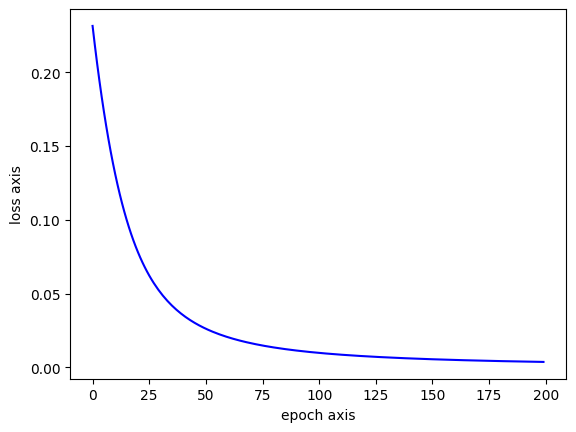

In [27]:
#初始化参数
W1 = np.array([[0.2, 0.3, -0.1],
        [-0.1, 0.5, 0.2],
        [0.1, -0.2, 0.3]]) # ndrarray (3,3)

b1 = np.array([0.1, 0.2, -0.1]) # ndarray (3,)

W2 = np.array([[0.2, 0.3, 0.1],
        [0.1, -0.2, 0.4]]) #ndarray (2,3)

b2 = np.array([0.1, -0.1]) # shape (2,)

X = np.array([0.5, 1.0, -0.5]) # shape (3,)

y_true = np.array([1, 0]) # shape (2, )

learning_rate = 0.05

epochs = 200
losses = []

for epoch in range(epochs):
  Z, H, y_pred = forward(W1, W2, b1, b2, X)
  loss = compute_loss(y_true, y_pred)
  losses.append(loss)

  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, H, W2, X)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate)

  if epoch%10 ==0:
    print("Epoch:", epoch + 1,
      "loss:", np.round(loss, 4),
      "W1_grad:", np.round(W1_grad.flatten(), 4),
      "W2_grad:", np.round(W2_grad.flatten(), 4),
      "b1_grad:", np.round(b1_grad.flatten(), 4),
      "b2_grad:", np.round(b2_grad.flatten(), 4),
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()